# Ejercicio de Trabajo YOLOv5 - Detección de Mascarilla

<font color='red'>No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



En este ejercicio se debe entrenar y probar un modelo de detección de mascarillas usando YOLOv5.

<font color='red'>La solución debe basarse en los ejemplos vistos en clases.</font>






# 0) Lista de integrantes de los grupos (Maximo 5 alumnos)



* FLORES NIETO CARLOS FABRICIO -- 184647

* MERMA HUAMAN NOHEMI NATALIA NOHEMI NATALIA-- 182920

* NINA GUARDAPUCLLA CARLOS ALEX -- 124799

* SANCA ZEVALLOS JERY -- 184655

* YUCRA TTITO LESLY YAHAIRA -- 150335

# 1) Definición de la base de datos

(1 puntos)

Cargue la base de datos del ejemplo visto en clases que se encuentra en

`https://www.dropbox.com/s/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip`.


In [ ]:
!wget https://www.dropbox.com/s/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip
!unzip -qq YOLOimages_eye_mouth.zip

--2023-03-31 04:16:53--  https://www.dropbox.com/s/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip [following]
--2023-03-31 04:16:53--  https://www.dropbox.com/s/raw/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1f7baf617a920b5de2c99884ed.dl.dropboxusercontent.com/cd/0/inline/B5Te0OYyjc-uOrtcHXPt5Dftd7_1CjdYhPdThKmglLLLnjDRLEehnjB1IEIuglz6QyqU1aFSHFq7bSIb1hCtzN0Fq-5apHbihdXpHHdSLPCMaHyFIJUjqJo4AwSJ_s7E6qdS_vDgWMril7Ne_4nXb6noUlTtLIRkOiKMZU4zshoz-w/file# [following]
--2023-03-31 04:16:54--  https://uc1f7baf617a920b5de2c99884ed.dl.dropboxusercontent.com/cd/0/inline/B5Te0OYyjc-uOrtcHXPt5Dftd7_1CjdYhPdThKmglLLL

# 2) Anotaciones de bounding boxes y clases

(2 puntos)

Crear un archivo `csv` que contenga las anotaciones y las clases y carguela un variable dataframe llamada `df` (de la librería pandas). Observe que en esta base de datos hay 198 imágenes a color de 33 personas. Cada persona tiene 3 fotos sin mascarilla y 3 fotos con mascarilla. El tamaño de cada imagen es de 256x256 pixeles. El nombre de las imágenes es `FM000xxx_nn.jpg`, donde `xxx` es el ID de la persona, y `nn` es el número de la foto de la persona, con `nn = 1,...6`. 

<font color='orange'>Las tres primeras fotos `nn=1,2,3` de la persona son sin mascarilla, mientras que las últimas tres `nn=4,5,6` son con mascarilla.</font>

<font color='red'>NO HACER ANOTACIÓN MANUAL:</font> como las caras en esta base de datos están centradas, asuma que TODAS las mascarillas están en la posición `x1 = 50`, `x2 = 206`, 	` y1 = 110`, `y2 = 226`. (esto no es perefecto pero es una muy buena aproximación práctica).

No olvidar que en este problema sólo hay una clase que detectar, y que esta clase es la clase `0`.


In [ ]:
!wget https://www.dropbox.com/s/4jp3xxj17g96rk2/YOLObb_eye_mouth.csv

--2023-03-31 04:17:36--  https://www.dropbox.com/s/4jp3xxj17g96rk2/YOLObb_eye_mouth.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4jp3xxj17g96rk2/YOLObb_eye_mouth.csv [following]
--2023-03-31 04:17:36--  https://www.dropbox.com/s/raw/4jp3xxj17g96rk2/YOLObb_eye_mouth.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b6e3ecf10b673d6dc4f471849.dl.dropboxusercontent.com/cd/0/inline/B5Qs5hne5iHYxiLgW54LdjsFyKhXrgtGUTdu_V44vO7N9lRksMJTFm3c0ch3HbsXKovL9Ixh4t74UqQ01t0hcpZzs7GG8ku8Bn0rRIir9S9x8FHnzYbocj4iBMEDiZZNgE-YXzac4lWpv3sjQu937tZllb75xO0TE5nuuH9nJ64L6Q/file# [following]
--2023-03-31 04:17:37--  https://uc8b6e3ecf10b673d6dc4f471849.dl.dropboxusercontent.com/cd/0/inline/B5Qs5hne5iHYxiLgW54LdjsFyKhXrgtGUTdu_V44vO7N9lRksMJTFm3c

In [ ]:
import pandas as pd
mascaras = pd.read_csv('YOLObb_eye_mouth.csv')
print('Planilla:')
mascaras

Planilla:


,File,x1,x2,y1,y2,c
0,FM000008_01.jpg,74.5544,110.1314,84.0287,101.0438,0
1,FM000008_01.jpg,156.1220,188.6185,81.9217,101.4196,0
2,FM000008_01.jpg,91.1291,171.2870,157.8583,187.3547,1
3,FM000008_02.jpg,74.5544,110.1314,84.0287,101.0438,0
4,FM000008_02.jpg,156.1220,188.6185,81.9217,101.4196,0
...,...,...,...,...,...,...
490,FM000164_04.jpg,156.1220,188.6185,81.9217,101.4196,0
491,FM000164_05.jpg,74.5544,110.1314,84.0287,101.0438,0
492,FM000164_05.jpg,156.1220,188.6185,81.9217,101.4196,0
493,FM000164_06.jpg,74.5544,110.1314,84.0287,101.0438,0


In [ ]:
def construir_csv(df):
  # construir dataframe
  File = []
  x1   = []
  x2   = []
  y1   = []
  y2   = []
  c    = []
  
  persona_anterior = "p1"
  for indice, fila in df.iterrows():
    persona = fila["File"]
    if persona != persona_anterior:
      nn = int(persona[10:11])
      if(nn >= 4):        
        File.append(persona)
        x1.append(50)
        x2.append(206)
        y1.append(110)
        y2.append(226)
        c.append(0)      
    persona_anterior = persona 
  data = {
    'File': File,
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    'c':c
  }
  
  df_new = pd.DataFrame(data)
  return df_new

# 2.1) Despliegue una imagen de ejemplo con bounding box

(1 punto)

Despliegue una imagen de la base de datos mostrando un bounding box con la mascarilla.

In [ ]:
import pandas as pd
df = construir_csv(mascaras)
df

,File,x1,x2,y1,y2,c
0,FM000008_04.jpg,50,206,110,226,0
1,FM000008_05.jpg,50,206,110,226,0
2,FM000008_06.jpg,50,206,110,226,0
3,FM000009_04.jpg,50,206,110,226,0
4,FM000009_05.jpg,50,206,110,226,0
...,...,...,...,...,...,...
94,FM000163_05.jpg,50,206,110,226,0
95,FM000163_06.jpg,50,206,110,226,0
96,FM000164_04.jpg,50,206,110,226,0
97,FM000164_05.jpg,50,206,110,226,0


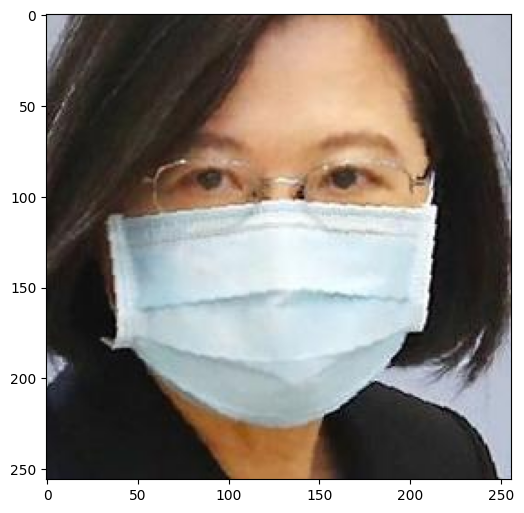

In [ ]:
# Despliegue de una imagen de ejemplo

import cv2
import matplotlib.pyplot as plt

X = cv2.imread('images/FM000008_05.jpg')
plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!wget https://www.dropbox.com/s/cnxdd60luo7ql96/boundingbox.csv

--2023-03-31 04:17:37--  https://www.dropbox.com/s/cnxdd60luo7ql96/boundingbox.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/cnxdd60luo7ql96/boundingbox.csv [following]
--2023-03-31 04:17:38--  https://www.dropbox.com/s/raw/cnxdd60luo7ql96/boundingbox.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc21b4976b0abf8e025810987f74.dl.dropboxusercontent.com/cd/0/inline/B5RAZFOoiGmHMzrikzBEYHf8v0gkJvtkh5t6BO1E6Yrxh7Cdc3yLecISo-DWxj3rm5UbuU0CmzQJJlbTGjpjfWaW3VDdHTqY7lAw6csU0EVk20Fz4NuRwK8AxPyOVh8C7lezJpAj0FvxpkUvnqXcZLsEW3zFgeJMcu71Xs8HbGIgWg/file# [following]
--2023-03-31 04:17:38--  https://uc21b4976b0abf8e025810987f74.dl.dropboxusercontent.com/cd/0/inline/B5RAZFOoiGmHMzrikzBEYHf8v0gkJvtkh5t6BO1E6Yrxh7Cdc3yLecISo-DWxj3rm5UbuU0

In [ ]:
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

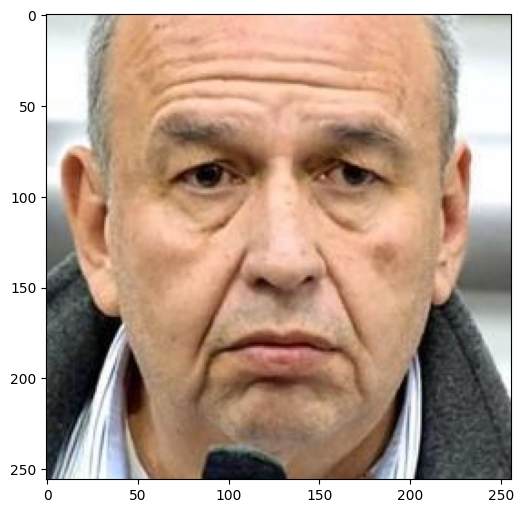

In [ ]:
# Despliegue de los bounding boxes anotados para la imagen i
d = dirfiles('images/','*.jpg')
i  = 92 # ID de la foto a desplegar
fname = d[i] # nombre de imagen i

X = cv2.imread('images/'+fname)
plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))

n = len(df)
# filas que contienen la imagen con nombre fname 
for k in range(n):
  if df.File[k] == fname:
    x1 = df.x1[k]
    x2 = df.x2[k]
    y1 = df.y1[k]
    y2 = df.y2[k]
    plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],c='g')

plt.show()

# 3) Genere los archivos para los formatos adecuados de YOLOv5

(2 punto)

Genere los archivos de texto en el formato adecuado de YOLO con las coordenadas normalizadas de los bounding boxes y el número de la clase de las imágenes que contienen mascarilla. Los archivos de texto deben guardarse en el directorio `labels`.

In [ ]:
!mkdir labels

In [ ]:
from tqdm.auto import tqdm
m = len(d) # numero de imagenes
n = len(df) # numero de bounding boxes

# en boundingbox.csv las clases son dos (0: ojo, 1:boca)


for i in tqdm(range(m)):
  fname = d[i]
  X = cv2.imread('images/'+fname)
  N = X.shape[0]
  M = X.shape[1]
  # filas que contienen la imagen con nombre fname
  ok = 0
  for k in range(n):
    tname = fname[:-3]+'txt'
    if df.File[k] == fname:
      x1 = df.x1[k]
      x2 = df.x2[k]
      y1 = df.y1[k]
      y2 = df.y2[k]
      c  = df.c[k]
      wn = (x2-x1)/M
      hn = (y2-y1)/N
      xn = (x1+x2)/2/M
      yn = (y1+y2)/2/N
      if ok == 0:
        f = open('labels/'+tname,'w+')
        ok = 1
      f.write(str(c)+' '+str(xn)+' '+str(yn)+' '+str(wn)+' '+str(hn)+'\n')
  if ok:
    f.close()


  0%|          | 0/198 [00:00<?, ?it/s]

# 4) Definición de subconjuntos de Training/Validation/Testing

(2 punto)

Divida las imágenes del dataset de la siguiente manera:

* las primeras 125 imágenes para el training,

* las siguientes 14 para validation,

* las últimas 59 para el testing.


Las imágenes (con sus archivos de texto de los labels correspondientes) deben ser copiados en los siguientes directorios:



```
data
   |——————images
   |        └——————train —— <trainimage01>.jpg
   |        |               <trainimage02>.jpg
   |        |                      :
   |        └——————val   —— <valimage01>.jpg
   |        |               <valimage02>.jpg
   |        |                      :
   |        └——————test —— <testimage01>.jpg
   |        |               <testimage02>.jpg
   |        |                      :
   └——————labels
   |        └——————train —— <trainimage01>.txt
   |        |               <trainimage02>.txt
   |        |                      :
   |        └——————val   —— <valimage01>.txt
   |        |               <valimage02>.txt
   |        |                      :
   |        └——————test —— <testimage01>.txt
   |        |               <testimage02>.txt
   |        |                      :
```


In [ ]:
!mkdir data
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test
!mkdir data/labels
!mkdir data/labels/train
!mkdir data/labels/val
!mkdir data/labels/test

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/images’: File exists


In [ ]:
import numpy as np

p_train = 0.70  # 70% del total de los datos son training
p_val   = 0.10  # 10% de los datos de training son de validación

d = dirfiles('images/','*.jpg')
m = len(d) # número de imagenes

nt = round(p_train*m)
nv = round(p_val*nt)

ii = np.vstack([np.zeros((nt-nv,1)),np.ones((nv,1)),2*np.ones((m-nt,1))])

target = ['train','val','test']

for i in tqdm(range(m)):
  fname            = d[i]
  tname            = fname[:-3]+'txt'
  ti               = target[int(ii[i])]
  source_file      = 'images/'+fname
  destination_file = 'data/images/'+ti 
  os.system('cp ' + source_file + ' ' + destination_file) 
  source_file      = 'labels/'+tname
  destination_file = 'data/labels/'+ti 
  os.system('cp ' + source_file + ' ' + destination_file) 

print('Training: ', nt-nv)
print('     Val: ', nv)
print(' Testing: ',m-nt)

  0%|          | 0/198 [00:00<?, ?it/s]

Training:  125
     Val:  14
 Testing:  59


# 5) Defina el archivo YAML para este problema

Defina el archivo `data/data.yaml` que contiene la información de: 

* los directorios de training, validation y testing

* el nombre de las clases

* el número de clases

In [ ]:
PATH_TRAIN = 'data/images/train'
PATH_VAL   = 'data/images/val'
PATH_TEST  = 'data/images/test'
N_CLASSES  = 1 # 0: ojo, 1: boca

class_names = ['mascara']


f = open('data/data.yaml','w+')

f.write('train: ../'+PATH_TRAIN+'\n')
f.write('val:   ../'+PATH_VAL+'\n')
f.write('test:  ../'+PATH_TEST+'\n')
f.write('nc:  '+str(N_CLASSES)+'\n')
f.write('names:  '+str(class_names)+'\n')

f.close()

# 6) Instale YOLOv5

(1 punto)

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt
!git clone https://github.com/ultralytics/yolov5
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15356, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15356 (delta 0), reused 0 (delta 0), pack-reused 15355
Receiving objects: 100% (15356/15356), 14.33 MiB | 25.48 MiB/s, done.
Resolving deltas: 100% (10500/10500), done.
/content/yolov5/yolov5/yolov5/yolov5


# 7) Defina las variables necesarias para el entrenamiento de YOLOv5

(1 punto)

Defina las siguientes variables: 

* `YOLO_MODEL` : para usar modelo "yolov5s"

* `EPOCHS`: para 100 épocas

* `CFG`: con el nombre del archivo YAML de este modelo

* `TRAIN_WEIGHTS`: con el nombre del archivo `pt` que contiene los pesos pre-entrenados de este modelo

* `BATCH`: para que entrene con un batch de 8

* `IMG_SIZE`: con el tamaño de la imágen

* `YAMLFILE`: con el path del archivo `data.yaml` diseñado para este problema en el paso 5).

In [ ]:
YOLO_MODEL     = 'yolov5s' # puede ser yolov5m, yolov5l, yolov5x
EPOCHS         = 100
CFG            = YOLO_MODEL+'.yaml'
TRAIN_WEIGHTS  = YOLO_MODEL+'.pt'  # o pesos de otro modelo propio pre-entrenado
BATCH          = 8
IMG_SIZE       = 256
YAMLFILE       = '../data/data.yaml'

# 8) Entrene YOLOv5

(2 puntos)

Entre el modelo YOLOv5 usando las variables definidas en el paso anterior. 

<font color='orange'>Asegúrese que Colab esté usando GPU.</font>




In [ ]:
!python train.py --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCHS} --data {YAMLFILE} --cfg {CFG} --weights {TRAIN_WEIGHTS} --nosave --cache

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=../data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=256, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

# 10) Detección en el testing

(2 puntos)

Pruebe el modelo en las imágenes del testing, y despliegue los resultados para la imagen `FM000155_04.jpg`


In [ ]:
TEST_WEIGHTS = 'runs/train/exp/weights/last.pt'  # ver path en las ultimas lineas de la ejecución anterior
PATH_TEST    = '../data/images/test'

!python detect.py --weights {TEST_WEIGHTS} --img {IMG_SIZE} --conf 0.4 --source  {PATH_TEST}

detect: weights=['runs/train/exp/weights/last.pt'], source=../data/images/test, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/59 /content/yolov5/yolov5/yolov5/data/images/test/FM000145_02.jpg: 256x256 (no detections), 12.3ms
image 2/59 /content/yolov5/yolov5/yolov5/data/images/test/FM000145_03.jpg: 256x256 (no detections), 12.4ms
image 3/59 /content/yolov5/yolov5/yolov5/data/images/test/FM000145_04.jpg: 256x256 1 mascara, 12.8ms
image 4/59 /content/yolov5/yol

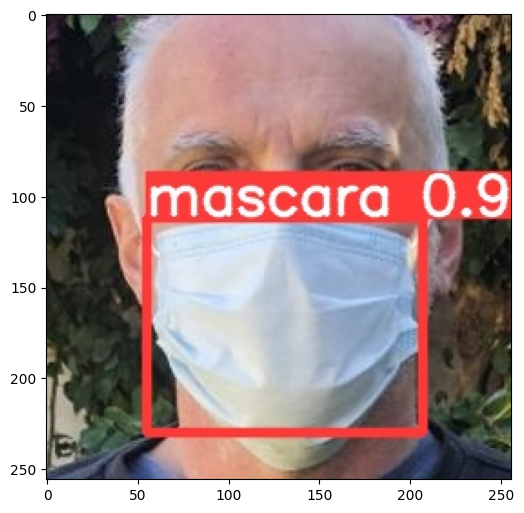

In [ ]:
X = cv2.imread('runs/detect/exp/FM000155_04.jpg')

plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.show()


# 11) Estadísticas en testing

(2 puntos)

Grafique la curva de precision-recall del testing con el valor `mAP`

In [ ]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --task test

val: data=../data/data.yaml, weights=['runs/train/exp/weights/last.pt'], batch_size=32, imgsz=256, conf_thres=0.001, iou_thres=0.25, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/yolov5/yolov5/data/labels/test... 30 images, 29 backgrounds, 0 corrupt: 100% 59/59 [00:00<00:00, 1907.53it/s]
test: New cache created: /content/yolov5/yolov5/yolov5/data/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.79it/s]
                   all         59         30      0.997      0.933      0.936      0.768
Speed: 0.1ms pre-process, 2

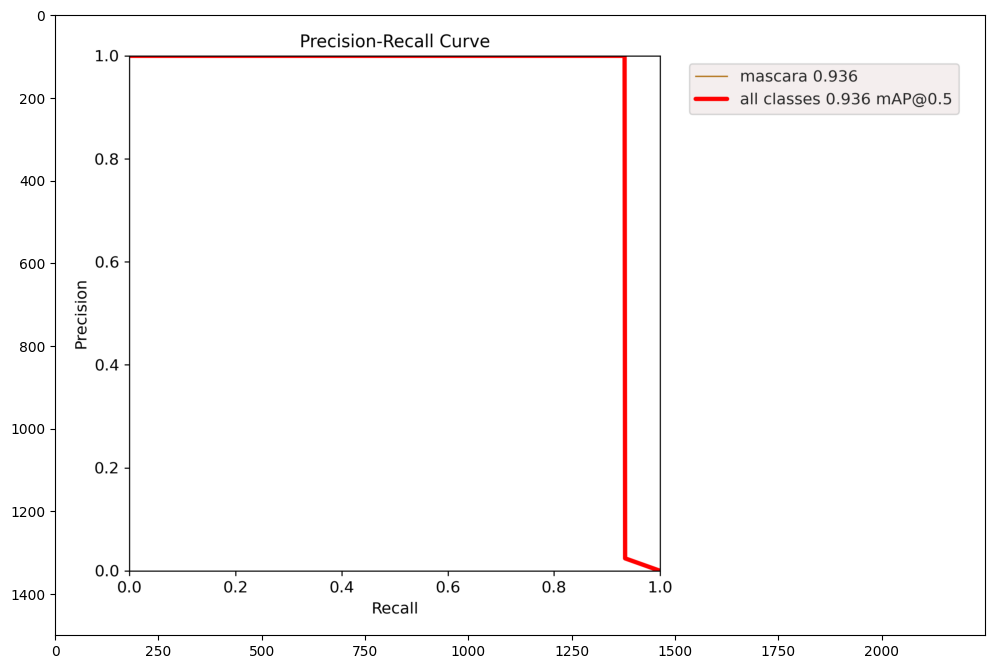

In [ ]:
I = cv2.imread('runs/val/exp/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

# 12) Pruebe el modelo con una imagen nueva

(2 puntos)

Verifique la efectividad del modelo de detección de mascarillas entrenado en este ejercicio con la imagen disponible en `https://www.dropbox.com/s/vrquzkxagy7vyi1/testface.png` 

In [ ]:
!wget https://www.dropbox.com/s/vrquzkxagy7vyi1/testface.png
NEW_PATH_TEST = '../newtest'
TEST_IMAGE    = 'testface.png'
!mkdir {NEW_PATH_TEST}
!cp {TEST_IMAGE} {NEW_PATH_TEST}
!python detect.py --weights {TEST_WEIGHTS} --img 256 --conf 0.4 --source  {NEW_PATH_TEST} --save-txt

--2023-03-31 04:22:06--  https://www.dropbox.com/s/vrquzkxagy7vyi1/testface.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/vrquzkxagy7vyi1/testface.png [following]
--2023-03-31 04:22:11--  https://www.dropbox.com/s/raw/vrquzkxagy7vyi1/testface.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uced8705443691c0a25f085847c2.dl.dropboxusercontent.com/cd/0/inline/B5Q93YCfGOSjV8fmJI862aMytQzxnSU2So2j9rFkFarqFeExjBejgbgZeKHXfLj1DBGD4fxT5Onuru73j6EypG-TqiO_P8rwFIR8AWnP7JYi5Pc17zKr2Y6hCs49DRLPaXg7-Ykx7P5DSuHG4AMaFZuokLDQsBoSub0r1SQP_KgHaA/file# [following]
--2023-03-31 04:22:12--  https://uced8705443691c0a25f085847c2.dl.dropboxusercontent.com/cd/0/inline/B5Q93YCfGOSjV8fmJI862aMytQzxnSU2So2j9rFkFarqFeExjBejgbgZeKHXfLj1DBGD4fxT5Onuru73

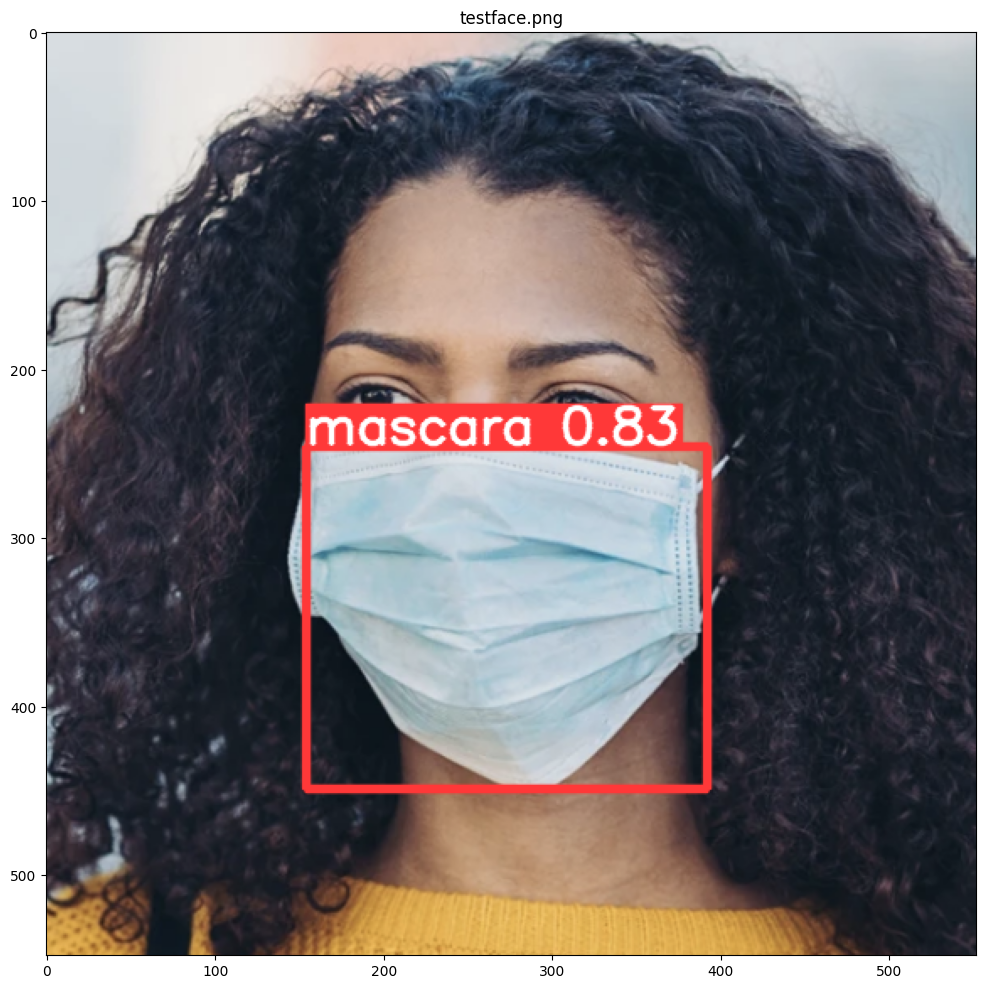

In [ ]:
X = cv2.imread('runs/detect/exp2/'+TEST_IMAGE)
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(TEST_IMAGE)
plt.show()

# 13) Interprete los resultados

(2 puntos)

Interprete el significado de las métricas y proponga alguna estrategia para mejorar los resultados

- Se pudo visualizar un mayor aumento en el valor del mAP, cuando se entreno los datos solamente con personas que tienen mascarillas. 

- La diferencia grafica se logra visualizar en el declive de la presicion, entrenado con todas las imagenes(con y sin mascarilla) el declive la presicion estaba aproximadamente en 0.5 de recall pero entrenando solo con imagenes de personas con mascarilla el declive esta presente a mas del 0.93 de recall.

* Del Grafico se observa que el mAP50-95 que es el promedio de los resultados de las diferentes detecciones que realizó el modelo, por lo que cuanto mayor sea el mAP50-95 mejor sera la deteccion de nuestro modelo, debido a ello nuestro modelo con un 93% se considera que tiene un buen rendimiento

- Una propuesta para mejorar los resultados ya obtenidos es colocar las
posiciones reales de los valores x1,x2,y1,y2. Puesto que para este entrenamiento solo se coloca valores aproximados para cada imagen.

- Cuando se entreno un modelo YOLO para el reconocimiento de mascarillas, la precisión es mejor cuando se entrena solo con imágenes de personas usando mascarillas en lugar de utilizar un conjunto de datos que contenga imágenes de personas usando y no usando mascarillas.

- La razón principal es que cuando se entrena con un conjunto de datos que contiene imágenes de personas usando y no usando mascarillas, el modelo debe aprender a distinguir entre dos clases diferentes: las personas con mascarillas y las personas sin mascarillas. Esto puede ser más difícil para el modelo ya que hay más variabilidad en la clase de personas sin mascarillas, como la edad, el género, el color de piel, la posición de la cabeza y otros factores que pueden afectar la apariencia de la cara.
En cambio, cuando se entrena solo con imágenes de personas usando mascarillas, el modelo solo necesita aprender una clase: las personas con mascarillas. Esto puede hacer que sea más fácil para el modelo aprender a reconocer la presencia de mascarillas en la cara y aumentar la precisión del modelo en la tarea de reconocimiento de mascarillas.

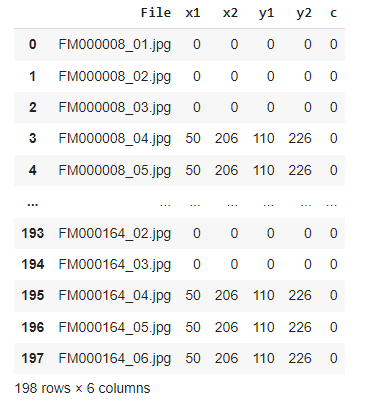

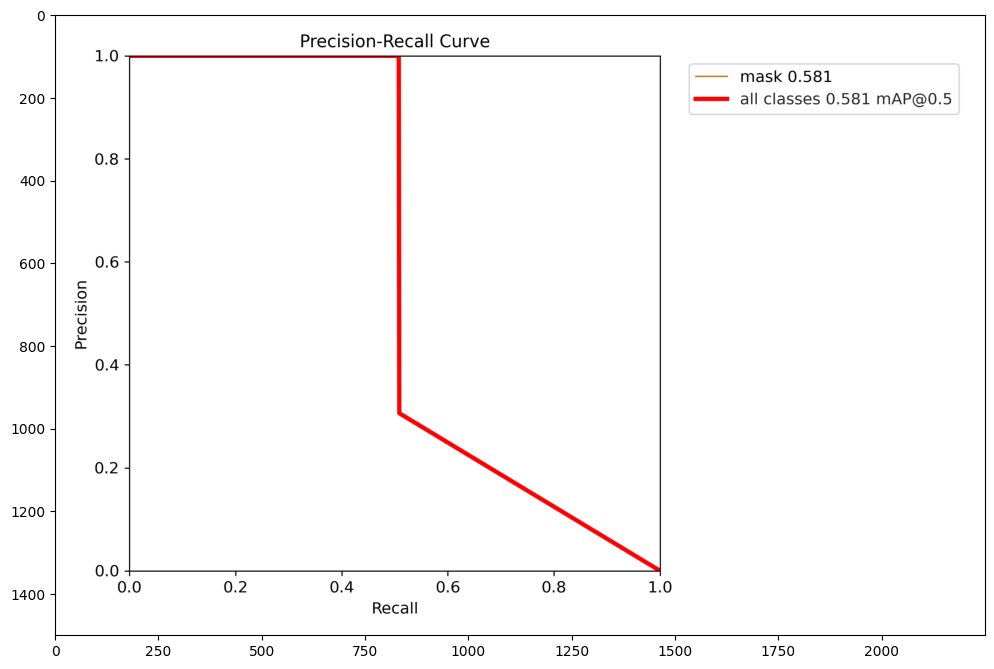

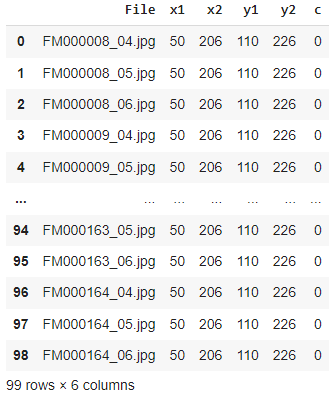

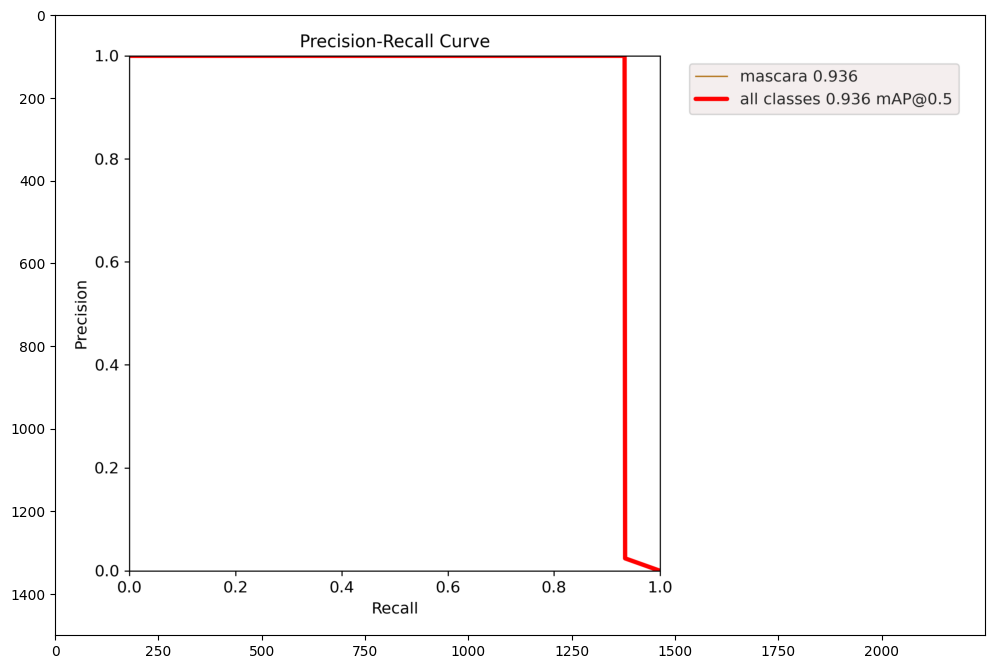

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL AL CLASSROOM</font> 

